### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import models
import matplotlib.pyplot as plt
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DL/dataset/T_train.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/DL/dataset/T_test.csv', infer_datetime_format=True,
                parse_dates={'dt' : ['Unnamed: 0']},
                 index_col='dt')

### Initial Pre-processing

In [5]:
train_data = np.asarray(df)
test_data = np.asarray(df2)

In [6]:
train_data.shape

(7007, 12)

In [7]:
hell = train_data[len(train_data)-24:].tolist()

In [8]:
with open("sample_t.json", "w") as outfile:
    json.dump(hell, outfile)

In [9]:
def create_training_sequence(data, sequence_length, step_size):
    sequences = []
    targets = []
    for i in range(0, len(data) - sequence_length-step_size):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length:i + sequence_length + step_size, 11]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [10]:
def create_test_sequence(data, sequence_length, step_size):
    hell = train_data[len(train_data)-sequence_length:].tolist()
    well = test_data[:step_size, 11].tolist()
    a = hell.copy()
    b = well.copy()
    sequences = [a.copy()]
    targets = [b.copy()]
    for i in range(0, len(data) - step_size):
        a.append(data[i].tolist())
        a.pop(0)
        b.append(data[i+step_size, 11].tolist())
        b.pop(0)
        sequences.append(a.copy())
        targets.append(b.copy())
    return np.array(sequences), np.array(targets)

### Step-size: 1

#### Pre-processing

In [11]:
time_step_1 = 1
sequence_length_1 = 24
X_train_1, y_train_1 = create_training_sequence(train_data, sequence_length_1, time_step_1)

In [12]:
X_train_1.shape, y_train_1.shape

((6982, 24, 12), (6982, 1))

In [13]:
X_test_1, y_test_1 = create_test_sequence(test_data, sequence_length_1, time_step_1)

In [14]:
X_test_1.shape, y_test_1.shape

((1729, 24, 12), (1729, 1))

#### Training the model

In [15]:
model_1 = Sequential()
model_1.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_1, X_train_1.shape[2])))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=time_step_1))

In [16]:
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=32)

Epoch 1/50
219/219 [==============================] - 5s 23ms/step - loss: 22859.8359
Epoch 2/50
219/219 [==============================] - 4s 16ms/step - loss: 8730.4941
Epoch 3/50
219/219 [==============================] - 2s 11ms/step - loss: 4940.2646
Epoch 4/50
219/219 [==============================] - 2s 11ms/step - loss: 6856.6475
Epoch 5/50
219/219 [==============================] - 2s 11ms/step - loss: 15773.3018
Epoch 6/50
219/219 [==============================] - 2s 11ms/step - loss: 13492.2822
Epoch 7/50
219/219 [==============================] - 4s 17ms/step - loss: 8747.7910
Epoch 8/50
219/219 [==============================] - 4s 17ms/step - loss: 5511.8940
Epoch 9/50
219/219 [==============================] - 2s 11ms/step - loss: 5548.7700
Epoch 10/50
219/219 [==============================] - 2s 11ms/step - loss: 6332.4839
Epoch 11/50
219/219 [==============================] - 2s 11ms/step - loss: 6095.7002
Epoch 12/50
219/219 [==============================] - 2s 11

#### Testing the mode

In [23]:
y_pred_1 = model_1.predict(X_test_1)

55/55 [==============================] - 0s 4ms/step


In [24]:
y_test_1.shape, y_pred_1.shape

((1729, 1), (1729, 1))

In [25]:
mse_1 = mean_squared_error(y_test_1, y_pred_1)
mae_1 = mean_absolute_error(y_test_1, y_pred_1)

In [26]:
print(f'Mean Squared Error: {mse_1}')
print(f'Mean Absolute Error: {mae_1}')

Mean Squared Error: 2886.8425736276754
Mean Absolute Error: 40.927781265550024


#### Visualizing y_pred vs y_test

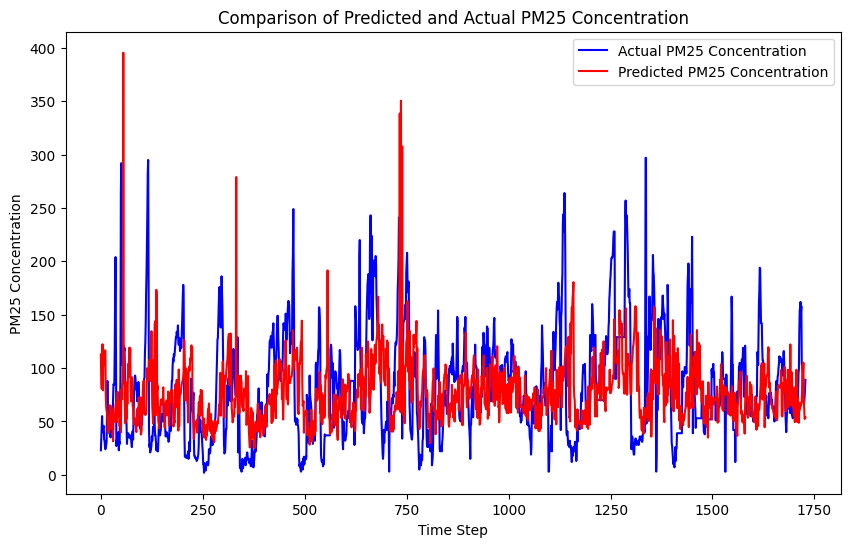

In [27]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_1, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_1, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [28]:
model_1.save("/content/drive/MyDrive/DL/T_model_1")

In [29]:
loaded_model_1 = models.load_model("/content/drive/MyDrive/DL/T_model_1")

### Step-size: 7

#### Pre-processing

In [30]:
time_step_7 = 7
sequence_length_7 = 24
X_train_7, y_train_7 = create_training_sequence(train_data, sequence_length_7, time_step_7)

In [31]:
X_train_7.shape, y_train_7.shape

((6976, 24, 12), (6976, 7))

In [32]:
X_test_7, y_test_7 = create_test_sequence(test_data, sequence_length_7, time_step_7)

In [33]:
X_test_7.shape, y_test_7.shape

((1723, 24, 12), (1723, 7))

#### Training the model

In [34]:
model_7 = Sequential()
model_7.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_7, X_train_7.shape[2])))
model_7.add(Dropout(0.2))
model_7.add(Dense(units=time_step_7))
model_7.compile(optimizer='adam', loss='mean_squared_error')
model_7.fit(X_train_7, y_train_7, epochs=100, batch_size=32)

Epoch 1/100
218/218 [==============================] - 4s 12ms/step - loss: 11590.1523
Epoch 2/100
218/218 [==============================] - 2s 10ms/step - loss: 5368.5625
Epoch 3/100
218/218 [==============================] - 2s 8ms/step - loss: 5961.6777
Epoch 4/100
218/218 [==============================] - 2s 9ms/step - loss: 7198.8657
Epoch 5/100
218/218 [==============================] - 2s 8ms/step - loss: 4909.2993
Epoch 6/100
218/218 [==============================] - 2s 9ms/step - loss: 4613.8428
Epoch 7/100
218/218 [==============================] - 2s 9ms/step - loss: 4349.5352
Epoch 8/100
218/218 [==============================] - 3s 13ms/step - loss: 4217.7461
Epoch 9/100
218/218 [==============================] - 3s 13ms/step - loss: 3688.4866
Epoch 10/100
218/218 [==============================] - 2s 10ms/step - loss: 3379.0029
Epoch 11/100
218/218 [==============================] - 2s 9ms/step - loss: 3451.1238
Epoch 12/100
218/218 [==============================] - 2

#### Testing the model

In [35]:
y_pred_7 = model_7.predict(X_test_7)

54/54 [==============================] - 1s 6ms/step


In [36]:
y_test_7.shape, y_pred_7.shape

((1723, 7), (1723, 7))

In [37]:
mse_7 = mean_squared_error(y_test_7, y_pred_7)
mae_7 = mean_absolute_error(y_test_7, y_pred_7)

In [38]:
print(f'Mean Squared Error: {mse_7}')
print(f'Mean Absolute Error: {mae_7}')

Mean Squared Error: 2735.2509027590568
Mean Absolute Error: 39.65764083226575


#### Visualizing y_pred vs y_test

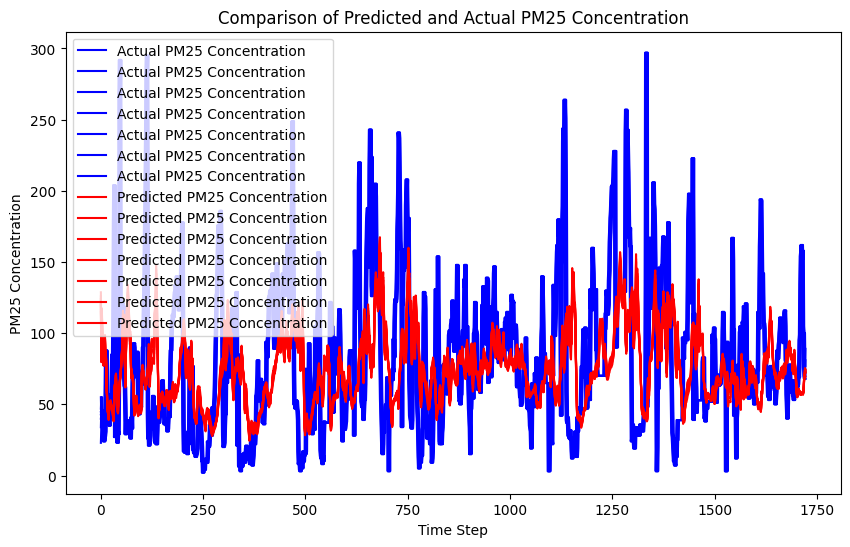

In [39]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_7, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_7, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [40]:
model_7.save("/content/drive/MyDrive/DL/T_model_7")

In [41]:
loaded_model_7 = models.load_model("/content/drive/MyDrive/DL/T_model_7")

### Step-size: 14

#### Pre-processing

In [42]:
time_step_14 = 14
sequence_length_14 = 24
X_train_14, y_train_14 = create_training_sequence(train_data, sequence_length_14, time_step_14)

In [43]:
X_train_14.shape, y_train_14.shape

((6969, 24, 12), (6969, 14))

In [44]:
X_test_14, y_test_14 = create_test_sequence(test_data, sequence_length_14, time_step_14)

In [45]:
X_test_14.shape, y_test_14.shape

((1716, 24, 12), (1716, 14))

#### Training the model

In [47]:
model_14 = Sequential()
model_14.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_14, X_train_14.shape[2])))
model_14.add(Dropout(0.2))
model_14.add(Dense(units=time_step_14))
model_14.compile(optimizer='adam', loss='mean_squared_error')
model_14.fit(X_train_14, y_train_14, epochs=50, batch_size=32)

Epoch 1/50
218/218 [==============================] - 6s 17ms/step - loss: 11540.7021
Epoch 2/50
218/218 [==============================] - 3s 14ms/step - loss: 7364.7974
Epoch 3/50
218/218 [==============================] - 2s 11ms/step - loss: 5251.8926
Epoch 4/50
218/218 [==============================] - 2s 11ms/step - loss: 5184.6704
Epoch 5/50
218/218 [==============================] - 2s 11ms/step - loss: 4713.4116
Epoch 6/50
218/218 [==============================] - 3s 13ms/step - loss: 4788.8154
Epoch 7/50
218/218 [==============================] - 4s 17ms/step - loss: 4354.5059
Epoch 8/50
218/218 [==============================] - 3s 14ms/step - loss: 4340.2129
Epoch 9/50
218/218 [==============================] - 2s 11ms/step - loss: 4415.0962
Epoch 10/50
218/218 [==============================] - 2s 11ms/step - loss: 4077.6260
Epoch 11/50
218/218 [==============================] - 2s 11ms/step - loss: 4086.6716
Epoch 12/50
218/218 [==============================] - 3s 13ms

#### Testing the model

In [48]:
y_pred_14 = model_14.predict(X_test_14)

54/54 [==============================] - 0s 4ms/step


In [49]:
y_test_14.shape, y_pred_14.shape

((1716, 14), (1716, 14))

In [50]:
mse_14 = mean_squared_error(y_test_14, y_pred_14)
mae_14 = mean_absolute_error(y_test_14, y_pred_14)

In [51]:
print(f'Mean Squared Error: {mse_14}')
print(f'Mean Absolute Error: {mae_14}')

Mean Squared Error: 2427.023904053923
Mean Absolute Error: 37.725476474552366


#### Visualizing y_pred vs y_test

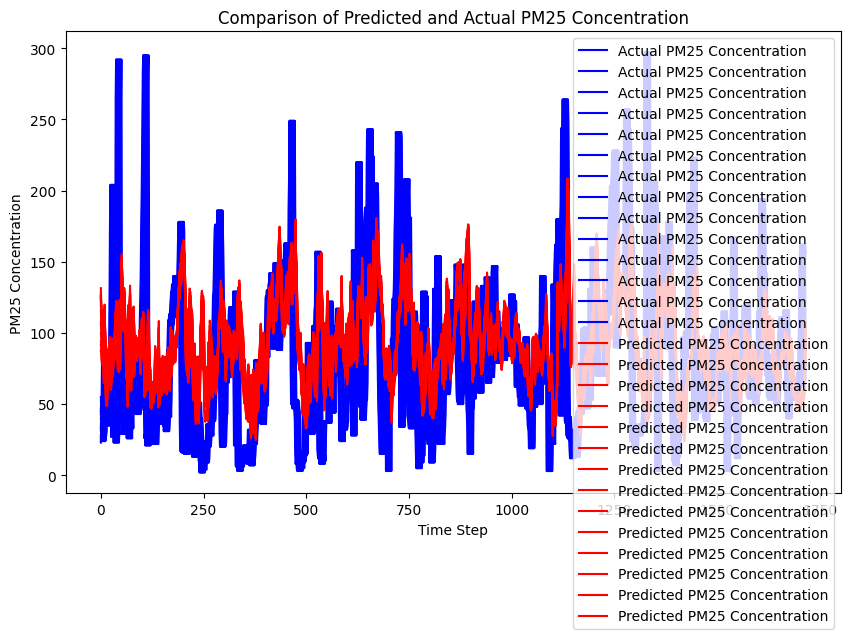

In [52]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_14, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_14, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [53]:
model_14.save("/content/drive/MyDrive/DL/T_model_14")

In [54]:
loaded_model_14 = models.load_model("/content/drive/MyDrive/DL/T_model_14")

### Step-size: 30

#### Pre-processing

In [55]:
time_step_30 = 30
sequence_length_30 = 24
X_train_30, y_train_30 = create_training_sequence(train_data, sequence_length_30, time_step_30)

In [56]:
X_train_30.shape, y_train_30.shape

((6953, 24, 12), (6953, 30))

In [57]:
X_test_30, y_test_30 = create_test_sequence(test_data, sequence_length_30, time_step_30)

In [58]:
X_test_30.shape, y_test_30.shape

((1700, 24, 12), (1700, 30))

#### Training the model

In [59]:
model_30= Sequential()
model_30.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_30, X_train_30.shape[2])))
model_30.add(Dropout(0.2))
model_30.add(Dense(units=time_step_30))
model_30.compile(optimizer='adam', loss='mean_squared_error')
model_30.fit(X_train_30, y_train_30, epochs=100, batch_size=32)

Epoch 1/100
218/218 [==============================] - 4s 10ms/step - loss: 10580.2900
Epoch 2/100
218/218 [==============================] - 3s 14ms/step - loss: 7426.0898
Epoch 3/100
218/218 [==============================] - 4s 17ms/step - loss: 6206.3184
Epoch 4/100
218/218 [==============================] - 3s 13ms/step - loss: 5720.3237
Epoch 5/100
218/218 [==============================] - 2s 11ms/step - loss: 5410.6680
Epoch 6/100
218/218 [==============================] - 2s 10ms/step - loss: 6549.0044
Epoch 7/100
218/218 [==============================] - 2s 11ms/step - loss: 6859.0918
Epoch 8/100
218/218 [==============================] - 3s 13ms/step - loss: 7313.2031
Epoch 9/100
218/218 [==============================] - 4s 17ms/step - loss: 6711.7646
Epoch 10/100
218/218 [==============================] - 3s 14ms/step - loss: 6274.7124
Epoch 11/100
218/218 [==============================] - 3s 14ms/step - loss: 6790.0137
Epoch 12/100
218/218 [=============================

#### Testing the model

In [60]:
y_pred_30 = model_30.predict(X_test_30)

54/54 [==============================] - 0s 3ms/step


In [61]:
y_test_30.shape, y_pred_30.shape

((1700, 30), (1700, 30))

In [62]:
mse_30 = mean_squared_error(y_test_30, y_pred_30)
mae_30 = mean_absolute_error(y_test_30, y_pred_30)

In [63]:
print(f'Mean Squared Error: {mse_30}')
print(f'Mean Absolute Error: {mae_30}')

Mean Squared Error: 2544.963159156641
Mean Absolute Error: 39.567649830462884


#### Visualizing y_pred vs y_test

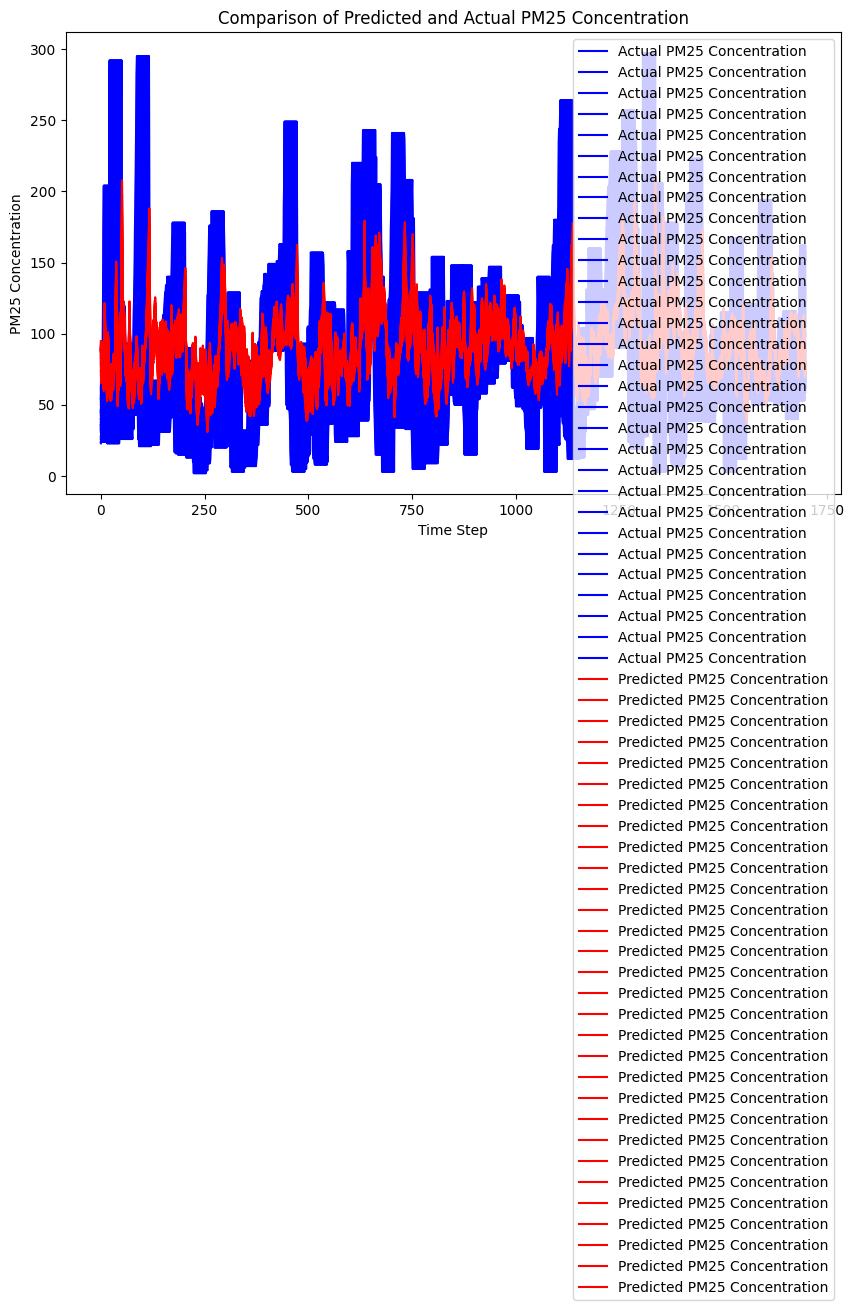

In [64]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_30, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_30, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [65]:
model_30.save("/content/drive/MyDrive/DL/T_model_30")

In [66]:
loaded_model_30 = models.load_model("/content/drive/MyDrive/DL/T_model_30")

### Step-size: 60

#### Pre-processing

In [67]:
time_step_60 = 60
sequence_length_60 = 24
X_train_60, y_train_60 = create_training_sequence(train_data, sequence_length_60, time_step_60)

In [68]:
X_train_60.shape, y_train_60.shape

((6923, 24, 12), (6923, 60))

In [69]:
X_test_60, y_test_60 = create_test_sequence(test_data, sequence_length_60, time_step_60)

In [70]:
X_test_60.shape, y_test_60.shape

((1670, 24, 12), (1670, 60))

#### Training the model

In [76]:
model_60 = Sequential()
model_60.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_60, X_train_60.shape[2])))
model_60.add(Dropout(0.2))
model_60.add(Dense(units=time_step_60))
model_60.compile(optimizer='adam', loss='mean_squared_error')
model_60.fit(X_train_60, y_train_60, epochs=50, batch_size=32)

Epoch 1/50
217/217 [==============================] - 5s 16ms/step - loss: 17002.3828
Epoch 2/50
217/217 [==============================] - 3s 12ms/step - loss: 8489.9932
Epoch 3/50
217/217 [==============================] - 2s 10ms/step - loss: 15212.5439
Epoch 4/50
217/217 [==============================] - 2s 10ms/step - loss: 10898.6807
Epoch 5/50
217/217 [==============================] - 2s 10ms/step - loss: 7710.0918
Epoch 6/50
217/217 [==============================] - 2s 10ms/step - loss: 7139.1870
Epoch 7/50
217/217 [==============================] - 4s 16ms/step - loss: 7452.7192
Epoch 8/50
217/217 [==============================] - 3s 15ms/step - loss: 6683.2114
Epoch 9/50
217/217 [==============================] - 2s 10ms/step - loss: 6265.0557
Epoch 10/50
217/217 [==============================] - 2s 11ms/step - loss: 6053.1562
Epoch 11/50
217/217 [==============================] - 2s 10ms/step - loss: 6057.8652
Epoch 12/50
217/217 [==============================] - 2s 10

#### Testing the model

In [77]:
y_pred_60 = model_60.predict(X_test_60)

53/53 [==============================] - 0s 4ms/step


In [78]:
y_test_60.shape, y_pred_60.shape

((1670, 60), (1670, 60))

In [79]:
mse_60 = mean_squared_error(y_test_60, y_pred_60)
mae_60 = mean_absolute_error(y_test_60, y_pred_60)

In [80]:
print(f'Mean Squared Error: {mse_60}')
print(f'Mean Absolute Error: {mae_60}')

Mean Squared Error: 2691.0042344663725
Mean Absolute Error: 40.338434925736074


#### Visualizing y_pred vs y_test

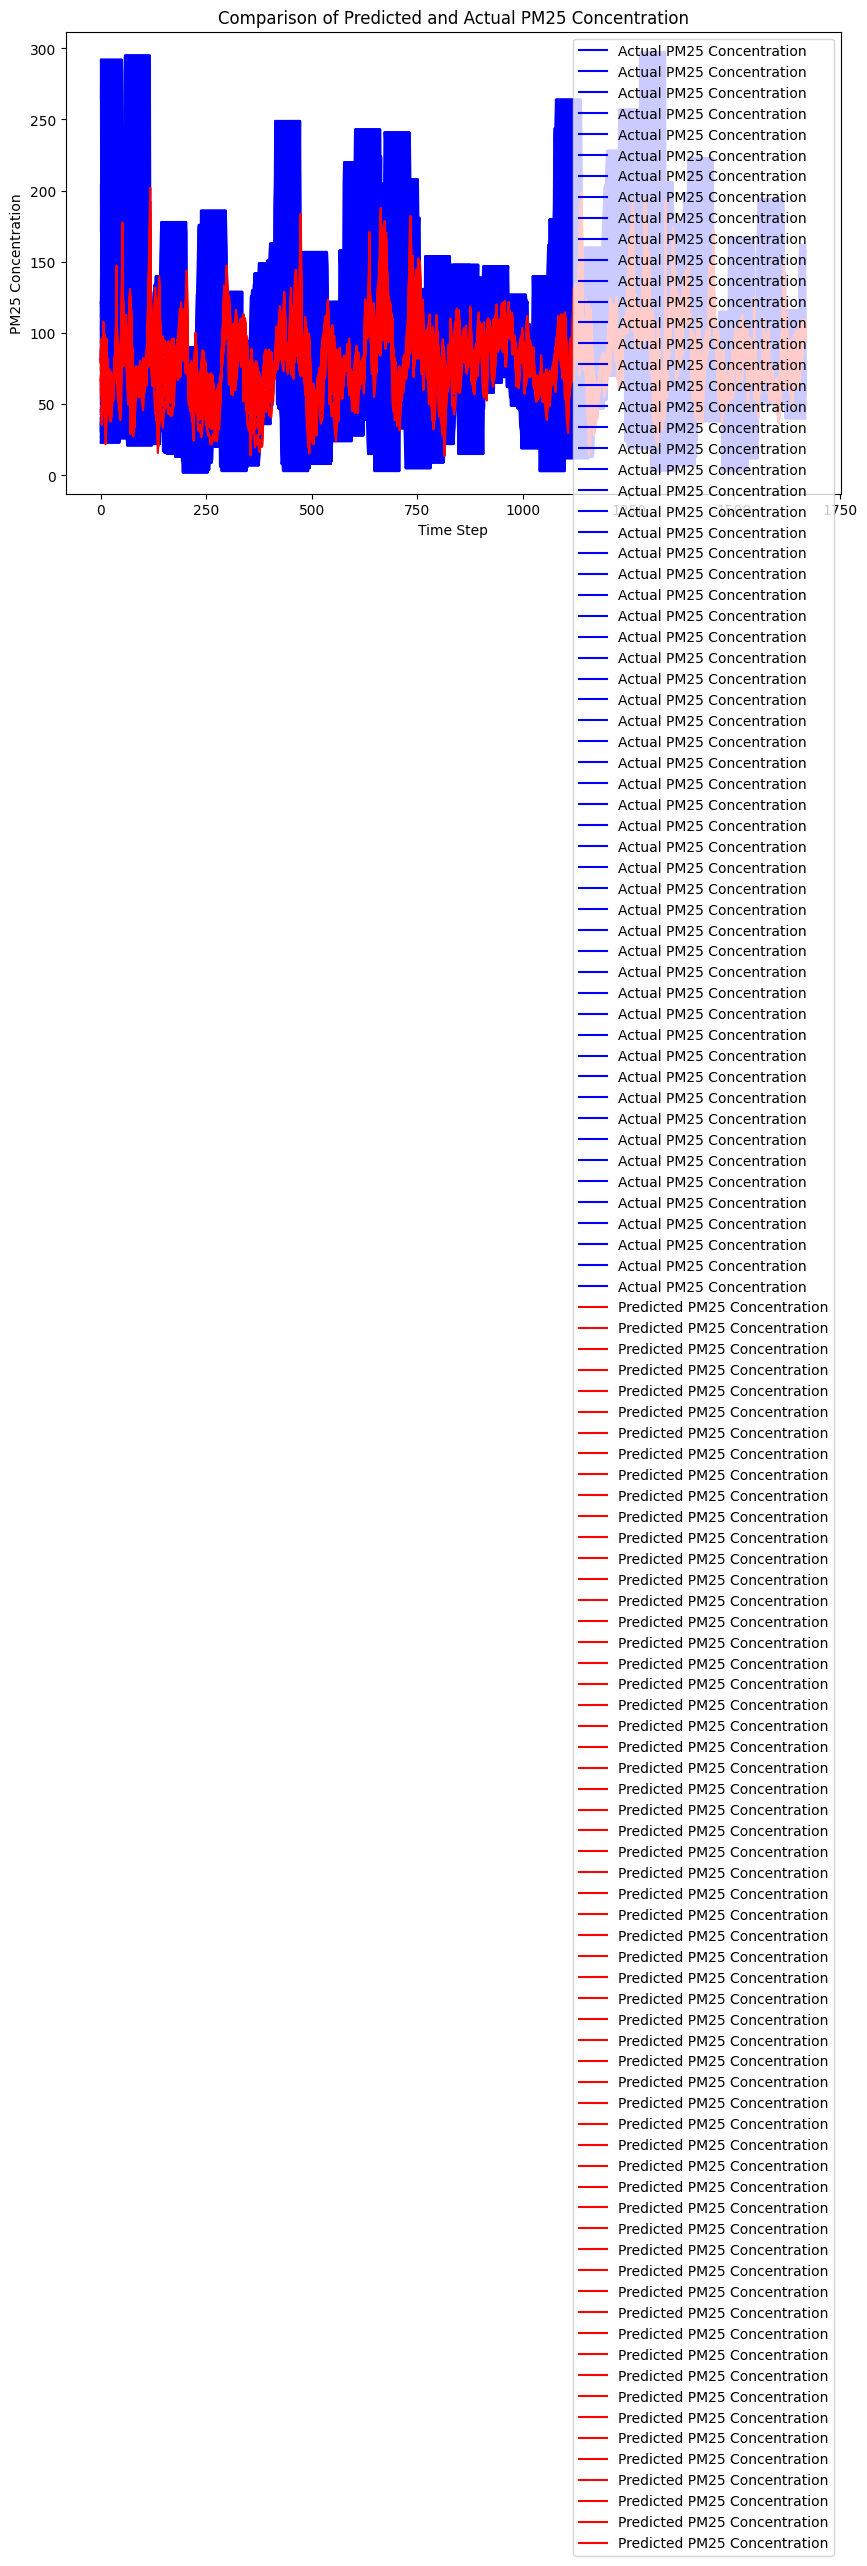

In [81]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_60, label='Actual PM25 Concentration', color='blue')
plt.plot(y_pred_60, label='Predicted PM25 Concentration', color='red')
plt.title('Comparison of Predicted and Actual PM25 Concentration')
plt.xlabel('Time Step')
plt.ylabel('PM25 Concentration')
plt.legend()
plt.show()

#### saving/loading the model

In [82]:
model_60.save("/content/drive/MyDrive/DL/T_model_60")

In [83]:
loaded_model_60 = models.load_model("/content/drive/MyDrive/DL/T_model_60")